#### The goals of this project are to: 
- get familiar with the 'attrition' dataset, 
- perform the exploratory data analysis 
- and last but not least: tackle the problem of imbalanced target variable with different sampling methods.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import utils

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter

import pickle
from joblib import dump, load

%matplotlib inline

### Importing the dataset

In [2]:
attr = pd.read_csv('data/attrition.csv')

**Education**
- 1 'Below College'
- 2 'College'
- 3 'Bachelor'
- 4 'Master'
- 5 'Doctor'

**EnvironmentSatisfaction**
- 1 'Low'
- 2 'Medium'
- 3 'High'
- 4 'Very High'

**JobInvolvement**
- 1 'Low'
- 2 'Medium'
- 3 'High'
- 4 'Very High'

**JobSatisfaction**
- 1 'Low'
- 2 'Medium'
- 3 'High'
- 4 'Very High'

**PerformanceRating**
- 1 'Low'
- 2 'Good'
- 3 'Excellent'
- 4 'Outstanding'

**RelationshipSatisfaction**
- 1 'Low'
- 2 'Medium'
- 3 'High'
- 4 'Very High'

**WorkLifeBalance**
- 1 'Bad'
- 2 'Good'
- 3 'Better'
- 4 'Best'

### Getting familiar with the data

In [3]:
pd.set_option('display.max_columns', 50)

In [4]:
attr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
attr.describe().round(1)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0
mean,36.9,802.5,9.2,2.9,1.0,1024.9,2.7,65.9,2.7,2.1,2.7,6502.9,14313.1,2.7,15.2,3.2,2.7,80.0,0.8,11.3,2.8,2.8,7.0,4.2,2.2,4.1
std,9.1,403.5,8.1,1.0,0.0,602.0,1.1,20.3,0.7,1.1,1.1,4708.0,7117.8,2.5,3.7,0.4,1.1,0.0,0.9,7.8,1.3,0.7,6.1,3.6,3.2,3.6
min,18.0,102.0,1.0,1.0,1.0,1.0,1.0,30.0,1.0,1.0,1.0,1009.0,2094.0,0.0,11.0,3.0,1.0,80.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,30.0,465.0,2.0,2.0,1.0,491.2,2.0,48.0,2.0,1.0,2.0,2911.0,8047.0,1.0,12.0,3.0,2.0,80.0,0.0,6.0,2.0,2.0,3.0,2.0,0.0,2.0
50%,36.0,802.0,7.0,3.0,1.0,1020.5,3.0,66.0,3.0,2.0,3.0,4919.0,14235.5,2.0,14.0,3.0,3.0,80.0,1.0,10.0,3.0,3.0,5.0,3.0,1.0,3.0
75%,43.0,1157.0,14.0,4.0,1.0,1555.8,4.0,83.8,3.0,3.0,4.0,8379.0,20461.5,4.0,18.0,3.0,4.0,80.0,1.0,15.0,3.0,3.0,9.0,7.0,3.0,7.0
max,60.0,1499.0,29.0,5.0,1.0,2068.0,4.0,100.0,4.0,5.0,4.0,19999.0,26999.0,9.0,25.0,4.0,4.0,80.0,3.0,40.0,6.0,4.0,40.0,18.0,15.0,17.0


## Basic data cleaning and type handling

### Looking for non-informative variables

In [7]:
attr.nunique().sort_values()

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

I can see that there are 3 columns: 'Over18', 'StandardHours' and 'EmployeeCount' which consist of only 1 value. There is also a column with a customer index: 'EmployeeNumber'. I will drop them as they give me no valuable information.

In [8]:
attr2 = attr.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)

### Type handling

In [9]:
cat_cols = [
    'Education'
    ,'EnvironmentSatisfaction'
    ,'JobInvolvement'
    ,'PerformanceRating'
    ,'JobSatisfaction'
    ,'RelationshipSatisfaction'
    ,'WorkLifeBalance'
    ,'JobLevel'
    ,'StockOptionLevel'
]

for col in cat_cols:
    attr2[col] = attr2[col].astype('category')

I know from the Kaggle site that some of the variables loaded as numerical are in fact categorical, therefore I change their types. I also spotted several categorical variables when looking at the descirptive statistics and unique values.

### Looking for dummies

In [10]:
attr2.isna().sum().sort_values()

Age                         0
YearsInCurrentRole          0
YearsAtCompany              0
WorkLifeBalance             0
TrainingTimesLastYear       0
TotalWorkingYears           0
StockOptionLevel            0
RelationshipSatisfaction    0
PerformanceRating           0
PercentSalaryHike           0
OverTime                    0
NumCompaniesWorked          0
MonthlyRate                 0
MonthlyIncome               0
YearsSinceLastPromotion     0
MaritalStatus               0
JobRole                     0
JobLevel                    0
JobInvolvement              0
HourlyRate                  0
Gender                      0
EnvironmentSatisfaction     0
EducationField              0
Education                   0
DistanceFromHome            0
Department                  0
DailyRate                   0
BusinessTravel              0
Attrition                   0
JobSatisfaction             0
YearsWithCurrManager        0
dtype: int64

There are no dummies in the data so we can continue with further steps.

### Looking for outliers

In [11]:
list_num = []
for i, _ in enumerate(attr2.dtypes):
    if attr2.dtypes[i] == 'int64':
        list_num.append(attr2.columns[i])

The first set of graphs shows me the full data distribution for numerical variables.

/Users/piotr/.pyenv/versions/3.8.3/envs/class_attrition/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


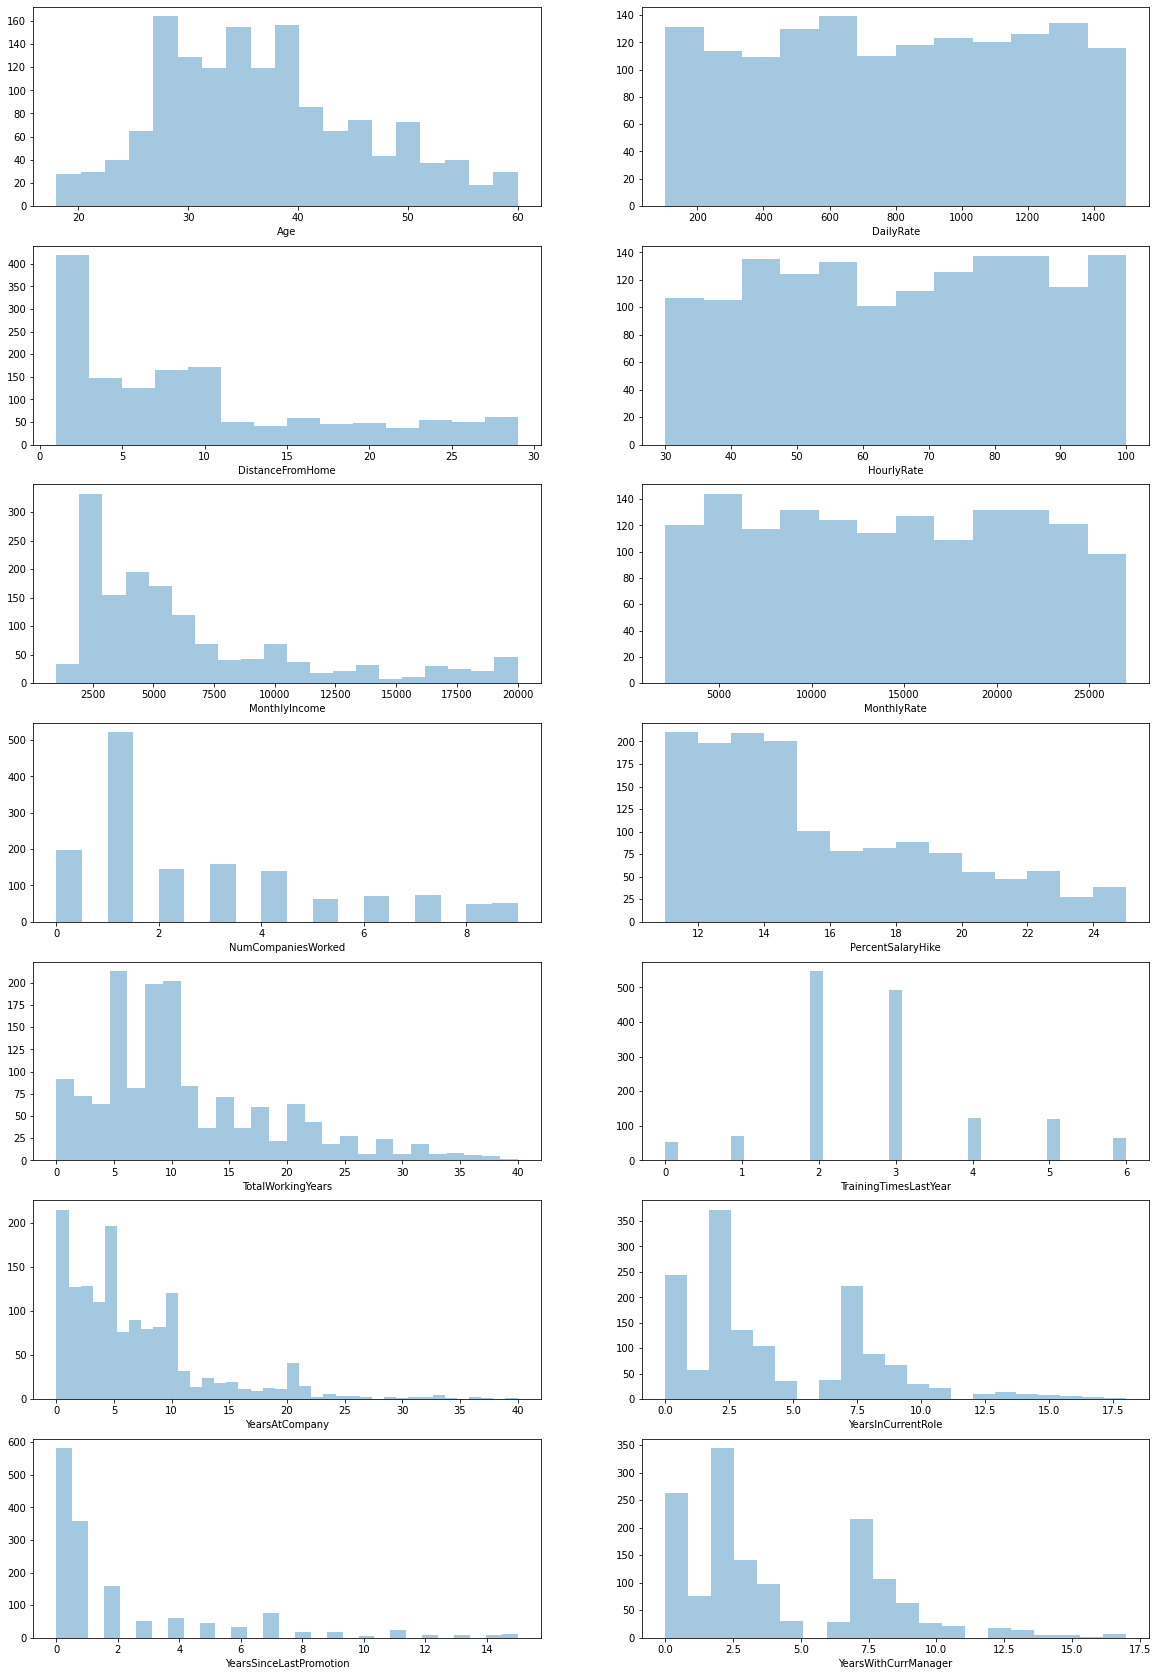

In [12]:
fig, axs = plt.subplots(7,2, figsize=(20,30))
for i,val in enumerate(list_num):
    sns.distplot(attr2[val], kde = False, ax=axs[i//2,i%2])

The second set of graphs however shows me the data in the terms of calculated quartiles, their ranges and outliers which were defined by the formula: Q1-1.5IQR and Q3+1.5IQR.

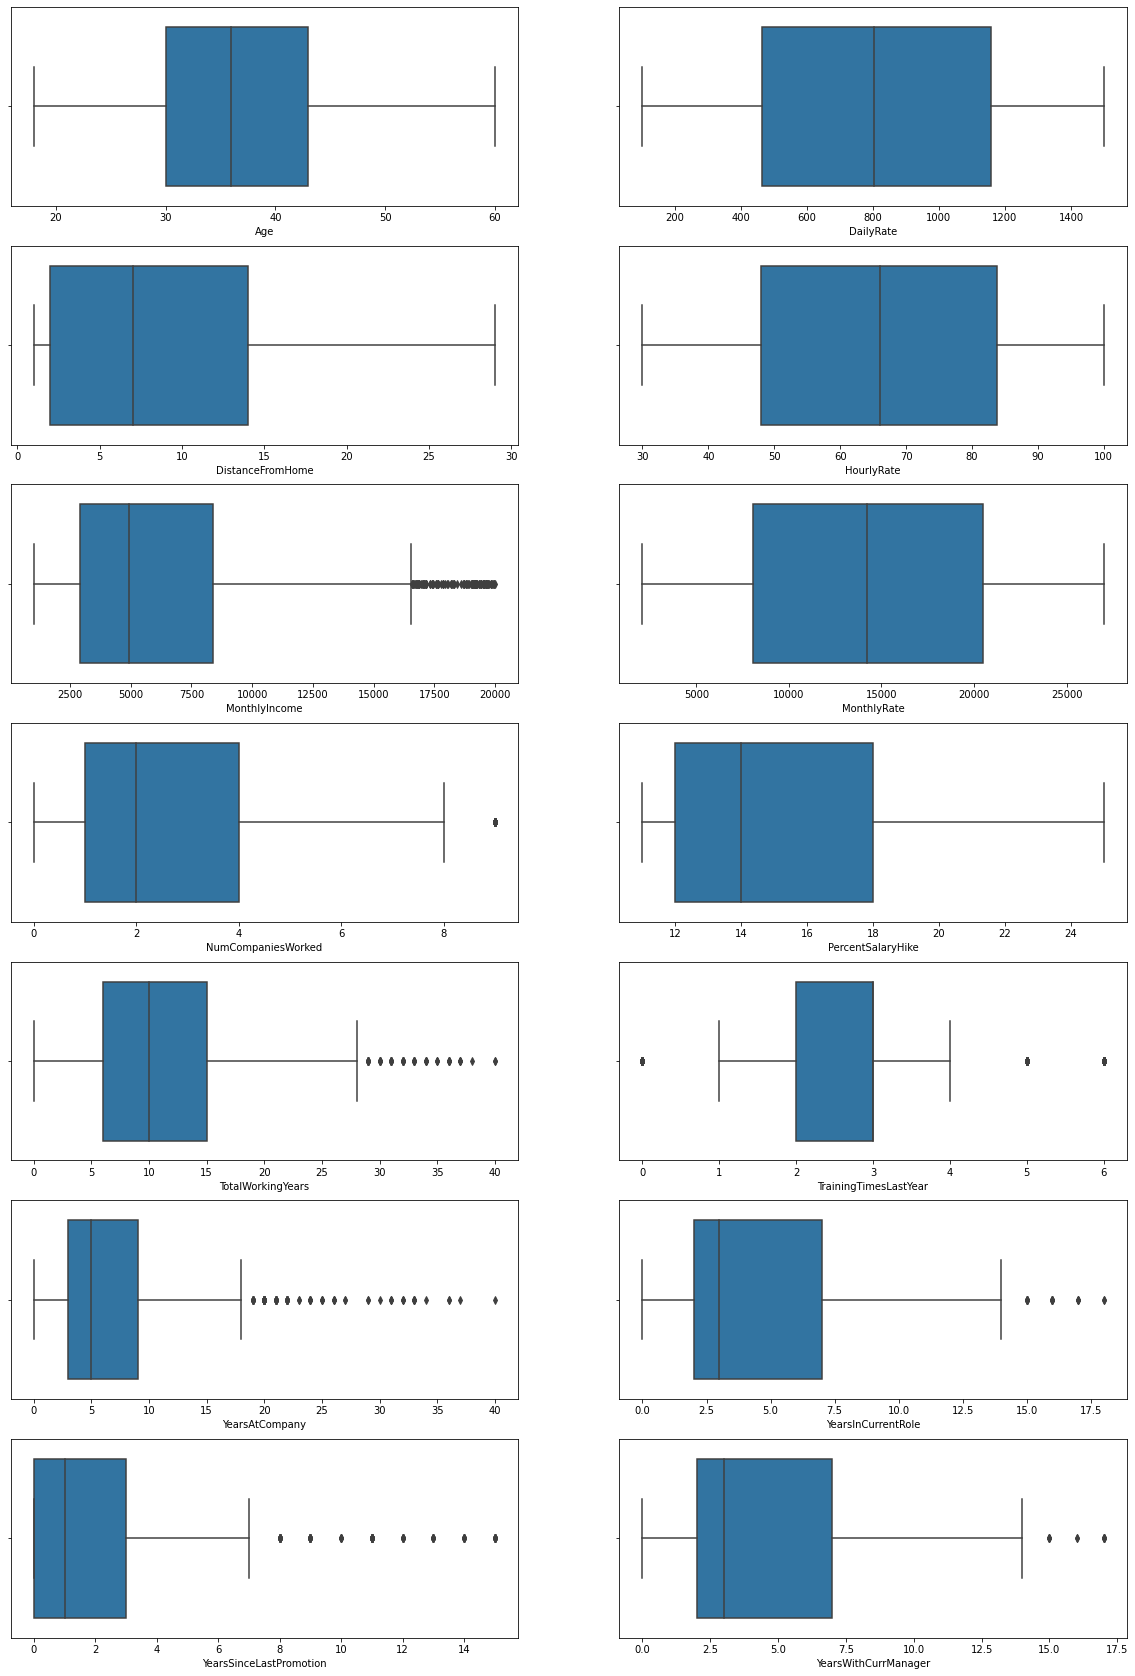

In [13]:
fig, axs = plt.subplots(7, 2, figsize=(20,30))
for i,val in enumerate(list_num):
    sns.boxplot(x = attr2[val], data = attr, ax = axs[i//2, i%2])

I can see that there are some outliers among numerical variables. However these are values are not some kind of an error. They can occur in a real-life HR database and shoud be included in the model. They are also not so much out of the scope so as to highly influence the model quality. Scaling all the variables before modelling shouldbe enough.

### Looking for imbalanced categories among categorical variables

In [14]:
list_char=[]
for i, _ in enumerate(attr2.dtypes):
    if attr2.dtypes[i] != 'int64' and attr2.columns[i] != 'Attrition':
        list_char.append(attr2.columns[i])

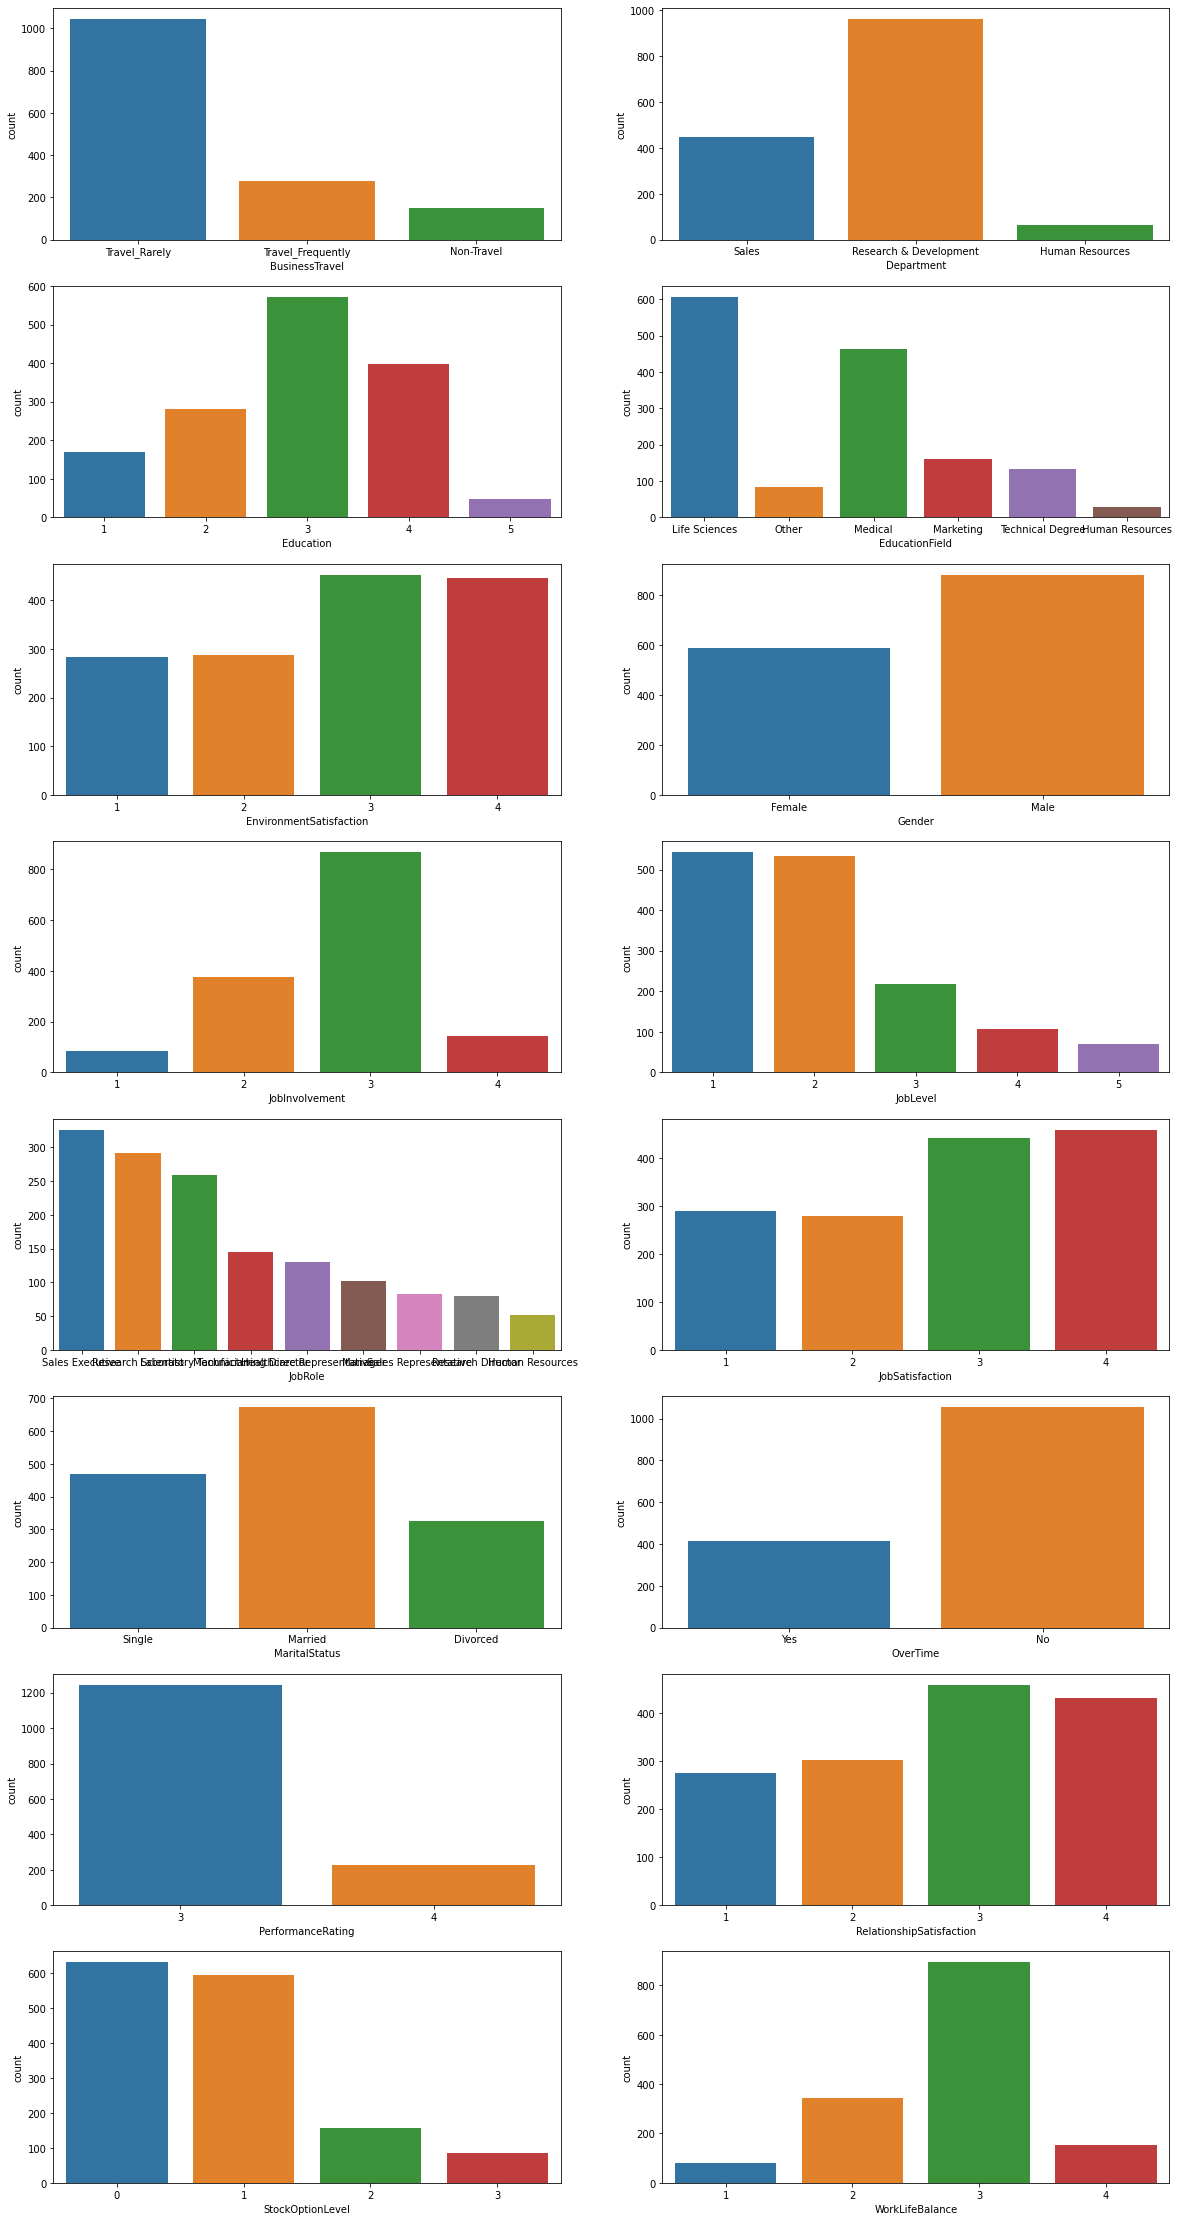

In [15]:
fig, axs = plt.subplots(8, 2, figsize=(20,40))
for i,val in enumerate(list_char):
    sns.countplot(x = attr2[val], data = attr2, ax = axs[i//2,i%2])

One can observe that in some of the variables there happen to be rare categories. In order to improve the model quality, one might decide to join some of the categories in bigger groups. It might be done with the use of common sense and life experience or with the use of analytical tools such as decision tree with a parameter for the minimum number of observations in leaves so as to achieve groups not smaller than a certain threshold.

### Checking the correlation between numerical variables

<AxesSubplot:>

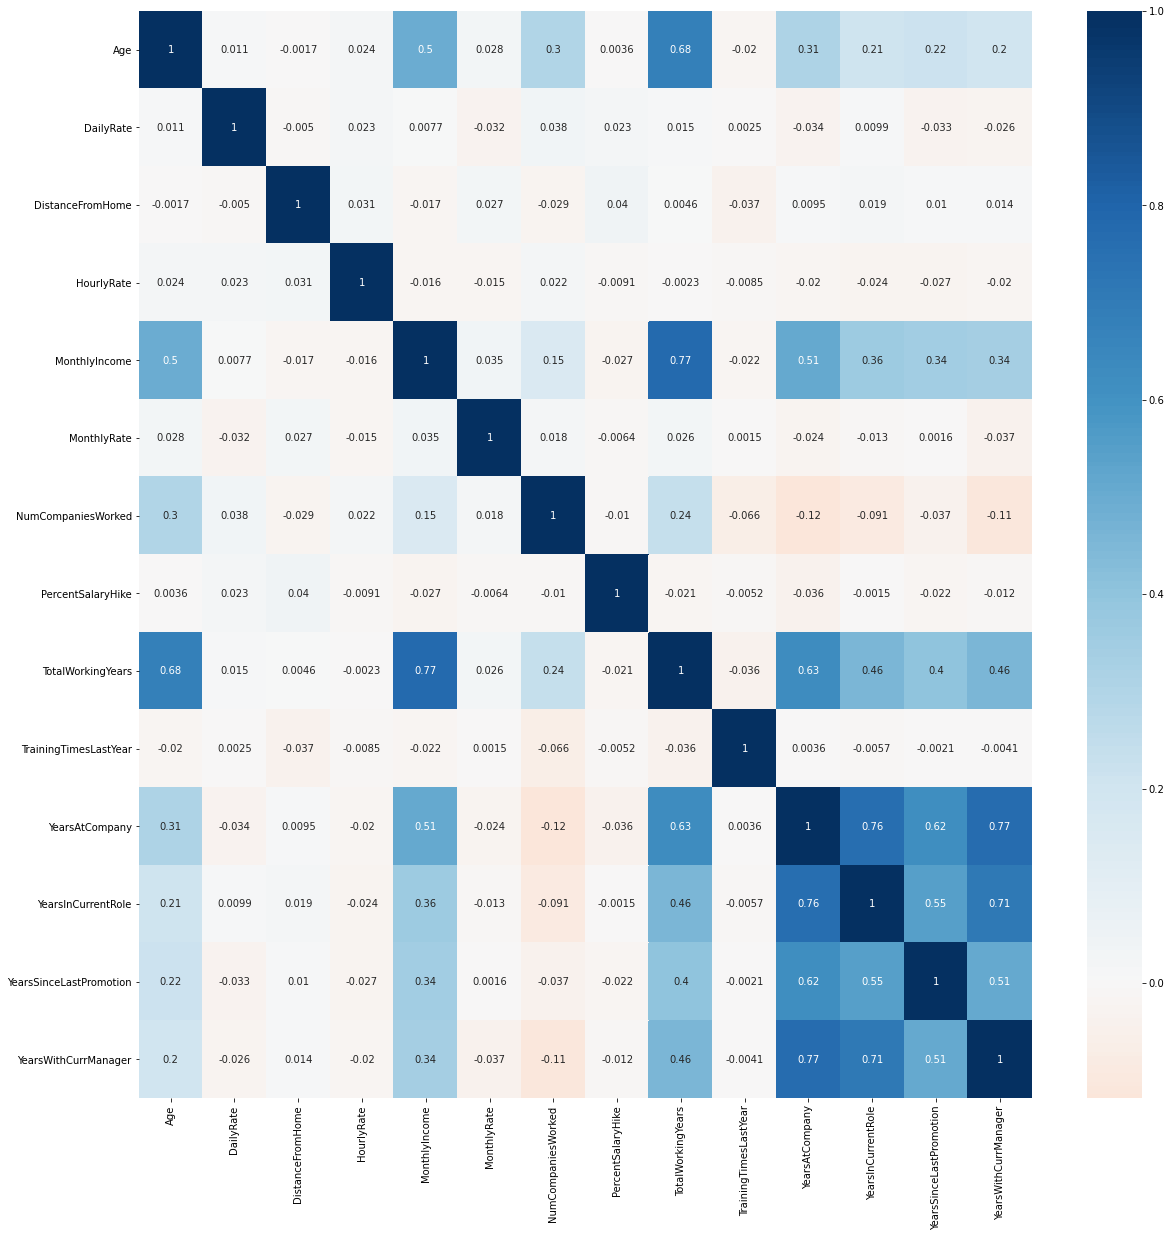

In [16]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(attr2.corr(), cmap = 'RdBu', center = 0, annot = True, ax = ax)

There is no collinearity in the data so we know for sure that there is no variable which explains fully the target variable. There ocuurs however a correlation of medium strength in some cases which means the data would benefit from regularization.

## Preparing the data for modelling purposes

### Checking the quality of response variable

In [17]:
attr2['Attrition'].value_counts(normalize = True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

Categories are rather imbalanced, it is recommended to try methods such as oversampling, undersampling or SMOTE in order to even it out.

### Creating training, validation and test samples

I chose the traditional approach of creating independent samples because the dataset is relatively small and contains only 1470 records. I will do the stratified sampling so as to avoid creating imbalanced datasets with a different proportion of targets.

#### Creating a test set containing 10% of data

In [18]:
train_validation, test = train_test_split (attr2, test_size=0.1, random_state=123, stratify=attr2['Attrition'])

#### Creating the training and validation dataset

In [19]:
train, validation = train_test_split (train_validation, 
                                      test_size=0.3, 
                                      random_state=123, 
                                      stratify=train_validation['Attrition'])

#### Comparing the proportion of targets among datasets

In [21]:
test.groupby('Attrition').size() / test.shape[0]

Attrition
No     0.836735
Yes    0.163265
dtype: float64

In [22]:
train.groupby('Attrition').size() / train.shape[0]

Attrition
No     0.839093
Yes    0.160907
dtype: float64

In [23]:
validation.groupby('Attrition').size() / validation.shape[0]

Attrition
No     0.838791
Yes    0.161209
dtype: float64

#### Preparing data for modelling - creating one dataset with the response variable and the other one with all the features

In [46]:
X_train = train.drop('Attrition', axis=1)
y_train = np.where(train.Attrition == 'Yes', 1, 0)

X_validation = validation.drop('Attrition', axis=1)
y_validation = np.where(validation.Attrition == 'Yes', 1, 0)

X_test = test.drop('Attrition', axis=1)
y_test = np.where(test.Attrition == 'Yes', 1, 0)

#### There is a group of categorical variables so we need to decode them into separate 1-0 variables

In [47]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_validation = pd.get_dummies(X_validation, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [49]:
X_colnames = X_train.columns

#### Scaling the data for modelling

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

I used here the most common StandardScaler however it might be worth trying out the RobustScaler which is handy when dealing with outliers. Perhaps one might achieve a slightly better model after such modification.

## Comparing the oversampling and SMOTE methods

I decided to compare only the two methods and leave out the undersampling method because the dataset I use is too small.

### Oversampling

In [27]:
oversample = RandomOverSampler(sampling_strategy=0.5)
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

### SMOTE

In [28]:
sm = SMOTE(random_state=12, sampling_strategy=0.5)
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train)

In [29]:
print('Originally in train: ', Counter(y_train), ', ', Counter(y_train)[1]/len(y_train))
print('After oversampling: ', Counter(y_train_over), ', ', Counter(y_train_over)[1]/len(y_train_over))
print('After SMOTE: ', Counter(y_train_smote), ', ', Counter(y_train_smote)[1]/len(y_train_smote))

Originally in train:  Counter({0: 777, 1: 149}) ,  0.16090712742980562
After oversampling:  Counter({0: 777, 1: 388}) ,  0.33304721030042916
After SMOTE:  Counter({0: 777, 1: 388}) ,  0.33304721030042916


I decided to make the '1' category as big as 50% of the '0' category.

## Running logistic regression on three different train datasets

I chose to use logistic regression with all default parameters so as to focus only on the oversampling and SMOTE methods, not on the model itself.

In [31]:
def fit_pred_model(model, X_train, y_train, X_validation):
    
    #Fitting the model
    model.fit(X_train, y_train)
    
    #Making predictions
    model_pred = model.predict_proba(X_validation)
    
    return model, model_pred[:,1]


In [32]:
logit_model, model_pred = fit_pred_model(LogisticRegression(), X_train, y_train, X_validation)
logit_model_over, model_pred_over = fit_pred_model(LogisticRegression(), X_train_over, y_train_over, X_validation)
logit_model_smote, model_pred_smote = fit_pred_model(LogisticRegression(), X_train_smote, y_train_smote, X_validation)

best_threshold, best_f_score, class_pred = utils.choose_threshold_and_evaluate(model_pred, y_validation)
best_threshold_over, best_f_score_over, class_pred_over = utils.choose_threshold_and_evaluate(model_pred_over, y_validation)
best_threshold_smote, best_f_score_smote, class_pred_smote = utils.choose_threshold_and_evaluate(model_pred_smote, y_validation)

### Drawing the ROC curve and calculating AUC metric

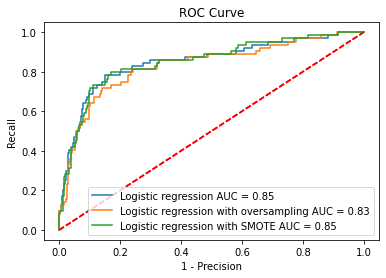

In [34]:
utils.plot_roc(y_validation, model_pred, model_name = "Logistic regression")
utils.plot_roc(y_validation, model_pred_over, model_name = "Logistic regression with oversampling")
utils.plot_roc(y_validation, model_pred_smote, model_name = "Logistic regression with SMOTE")

Neither the ROC curves nor the AUC values give me an information which would show me that one method is much better than the other.

### Calculating the confusion matrix

In [35]:
print("Logistic regression: ")
print(" ")
print(metrics.confusion_matrix(y_true=y_validation, y_pred=class_pred))
print(" ")
print("Logistic regression with oversampling: ")
print(" ")
print(metrics.confusion_matrix(y_true=y_validation, y_pred=class_pred_over))
print(" ")
print("Logistic regression with SMOTE: ")
print(" ")
print(metrics.confusion_matrix(y_true=y_validation, y_pred=class_pred_smote))

Logistic regression: 
 
[[303  30]
 [ 22  42]]
 
Logistic regression with oversampling: 
 
[[295  38]
 [ 22  42]]
 
Logistic regression with SMOTE: 
 
[[299  34]
 [ 19  45]]


### Comparing the value of F-score 

In the case of imbalanced data it is a good idea to calculate the F-score metric which serves as a helpful compromise between precision and recall.

In [36]:
print('Optimal threshold: %f with the F-Score=%.3f' % (best_threshold, best_f_score))
print('Optimal threshold with oversampling: %f with the F-Score=%.3f' % (best_threshold_over, best_f_score_over))
print('Optimal threshold with SMOTE: %f with the F-Score=%.3f' % (best_threshold_smote, best_f_score_smote))

Optimal threshold: 0.359054 with the F-Score=0.628
Optimal threshold with oversampling: 0.530593 with the F-Score=0.593
Optimal threshold with SMOTE: 0.545116 with the F-Score=0.639


After seeing all the results I would state that the oversampling and SMOTE methods did only slightly change the model quality. If one decided to maximize the F-score value, the best option would be to use the SMOTE method. However in our case it turns out that the data were not so imbalanced so as to have a detrimental effect on the model and it would be also fine to use the dataset as it is.

### After revising all the results I decide to stick with data obtained with the help of SMOTE algorithm which maximizes F-score metric

### Making predictions on the test dataset

In [37]:
model_pred_smote_test = logit_model_smote.predict_proba(X_test)
class_pred_smote_test = np.where(model_pred_smote_test > best_threshold_smote, 1, 0)

precision, recall, thresholds = metrics.precision_recall_curve(y_test, model_pred_smote_test[:,1])
f_score = 2 * precision * recall / (precision + recall)

### ROC curve for validation and test datasets

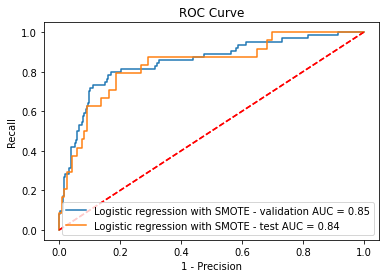

In [38]:
utils.plot_roc(y_validation, model_pred_smote, model_name = "Logistic regression with SMOTE - validation")
utils.plot_roc(y_test, model_pred_smote_test[:,1], model_name = "Logistic regression with SMOTE - test")

### Confusion matrix, precision, recall and f1-score for validation and test datasets

In [39]:
print("Logistic regression with SMOTE - validation: ")
print(" ")
print(metrics.confusion_matrix(y_true=y_validation, y_pred=class_pred_smote))
print(metrics.classification_report(y_validation, class_pred_smote))
print(" ")
print("Logistic regression with SMOTE - test: ")
print(" ")
print(metrics.confusion_matrix(y_true=y_test, y_pred=class_pred_smote_test[:,1]))
print(metrics.classification_report(y_test, class_pred_smote_test[:,1]))

Logistic regression with SMOTE - validation: 
 
[[299  34]
 [ 19  45]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       333
           1       0.57      0.70      0.63        64

    accuracy                           0.87       397
   macro avg       0.75      0.80      0.77       397
weighted avg       0.88      0.87      0.87       397

 
Logistic regression with SMOTE - test: 
 
[[112  11]
 [  9  15]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       123
           1       0.58      0.62      0.60        24

    accuracy                           0.86       147
   macro avg       0.75      0.77      0.76       147
weighted avg       0.87      0.86      0.87       147



One can observe that the results on test and validation datasets do not differ very much which means that SMOTE method was well used and that the results can serve as a source of conclusions about the possible reasons of employee attrition.

### Checking the variables significance

Text(0.5, 1.0, 'Variables coefficients')

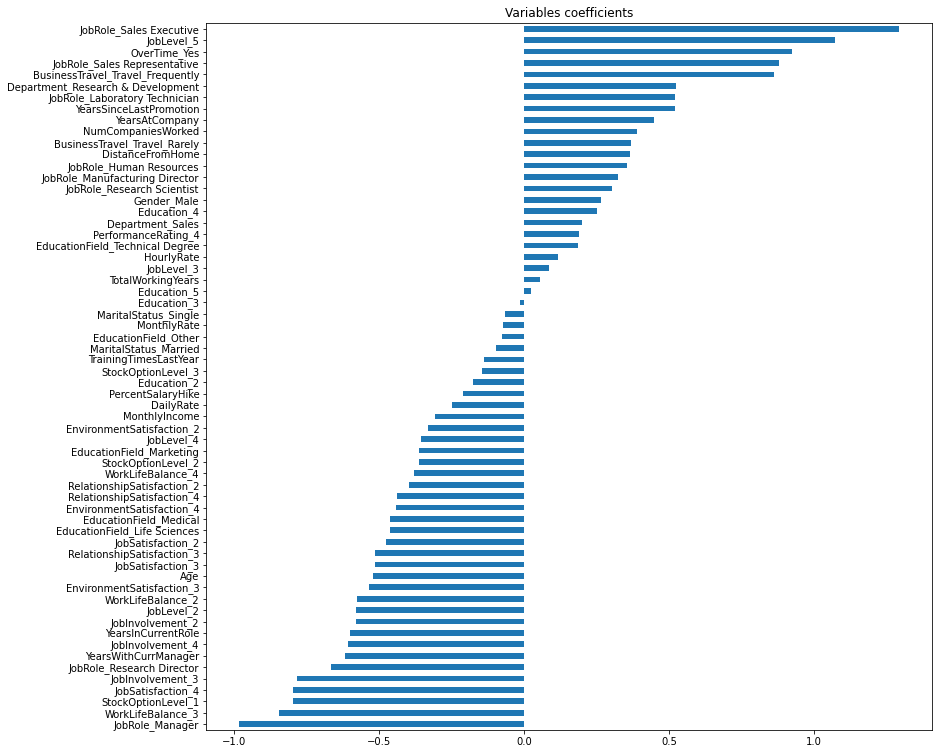

In [50]:
pd.Series(logit_model_over.coef_[0], X_colnames).sort_values().plot.barh(figsize=(13,13))
plt.title('Variables coefficients')

From the graph we can see that there are four most influential variables:
- JobLevel_5
- JobRole_Sales_Executive
- OverTime_Yes
- JobRole_Manager

### Creating exports

Exporting the preprocessed dataset for future use

In [65]:
pickle.dump(attr2, open("data/attrition_preprocessed.pickle", "wb"))

Exporting the model for future use

In [66]:
dump(logit_model_smote, 'logreg_model_after_smote.joblib') 

['logreg_model_after_smote.joblib']